# Diffusion Models

Implement a Score matching generative model in JAX to emulate posterior distribtions. Package name is fusions for diffusion meets ns (primarily constricted by what is available on pypi)

In [8]:
from fusions import DiffusionModel
import numpy as np
import matplotlib.pyplot as plt
import anesthetic as ns

Package wraps up everything in a class, designed to wrap around anesthetic (although currently just taking numpy arrays)

In [9]:
dims = 10
from scipy.stats import multivariate_normal
from numpy.random import default_rng

rng = default_rng(0)
# from sklearn.datasets import make_spd_matrix
# cov=make_spd_matrix(dims)
prior = multivariate_normal(mean=rng.normal(size=dims))
model = DiffusionModel(prior)
# model=DiffusionModel()
# model.beta_max=20

## Posterior to emulate

Emulate a Gaussian Mixture model with a uniform prior 

,0,1,2,3,4,5,6,7,8,9
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
5,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
6,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
7,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
8,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
9,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


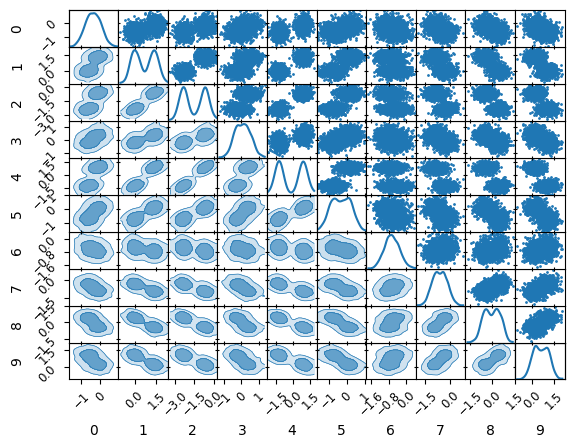

In [10]:
# from sklearn.datasets import make_spd_matrix
# cov=make_spd_matrix(dims)
# data = multivariate_normal(mean=rng.normal(size=dims), cov=cov).rvs(1000)
data_1=multivariate_normal(mean=rng.normal(size=dims),cov=np.eye(dims)*0.1).rvs(1000)
data_2=multivariate_normal(mean=rng.normal(size=dims),cov=np.eye(dims)*0.1).rvs(1000)
data=np.concatenate([data_1,data_2])
# plt.scatter(data[:,0],data[:,1])
ns.MCMCSamples(data).plot_2d()

# rng.normal(size=dims)

## Train the model and use it to make predictions

In [11]:
model.train(data, n_epochs=1000,batch_size=256,lr=1e-3)

100%|██████████| 1000/1000 [00:33<00:00, 30.09it/s, loss=0.5499471]


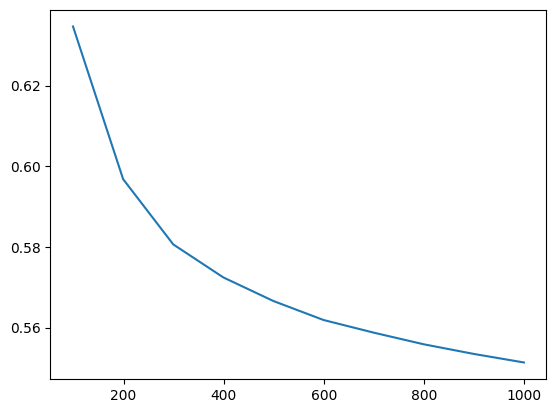

In [5]:
loss_hist=np.asarray(model.state.losses)
plt.plot(loss_hist[...,1], loss_hist[...,0])

Currently we are defining zero time in our diffusion process to be a gaussian prior, in theory we should be able to furnish the training process with any generative prior we like

In [12]:
x0=model.sample_prior(1000)
x1= model.predict(x0)
x1,x1_t=model.sample_posterior(1000,history=True)


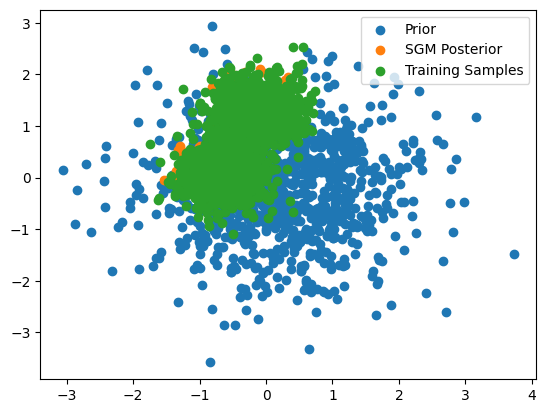

In [7]:
plt.scatter(x0[:,0],x0[:,1],label="Prior")
plt.scatter(x1[:,0],x1[:,1],label="SGM Posterior")
plt.scatter(data[:,0],data[:,1],label="Training Samples")
plt.legend()

Accuracy needs adjusting and plenty to play around with in terms of beta schedule etc. We can do cool things like plot trajectories of prior samples as a function of time as we diffuse them

,0,1
0,DiagonalAx...,OffDiagona...
1,OffDiagona...,DiagonalAx...


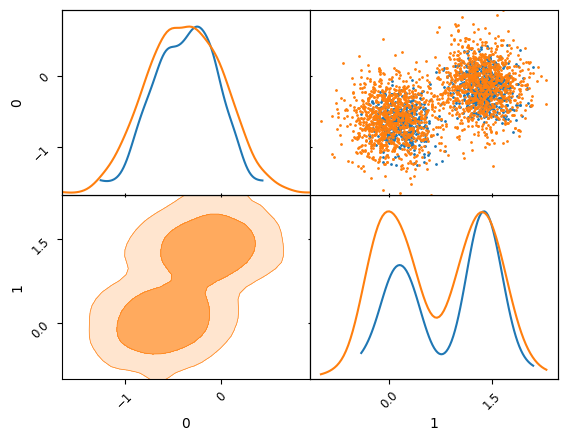

In [13]:
import anesthetic as ns
a=ns.MCMCSamples(x1).plot_2d([0,1])
ns.MCMCSamples(data).plot_2d(a)

In [ ]:
a=ns.MCMCSamples(x1).plot_2d(np.arange(5))
ns.MCMCSamples(data).plot_2d(a)

model_2=DiffusionModel()

In [ ]:
model2=DiffusionModel(model)
data_3=multivariate_normal(mean=rng.normal(size=dims),cov=np.eye(dims)*0.1).rvs(1000)
model2.train(data_3, n_epochs=1000,batch_size=256,lr=1e-3)

In [ ]:
loss_hist=np.asarray(model2.state.losses)
plt.plot(loss_hist[...,1], loss_hist[...,0])

In [ ]:
# x0_2=model2.sample_prior(1000)

x2, x2_t= model2.predict(x1,history=True)
# x1_2,x1_t_2=model2.sample_posterior(1000,history=True)

In [ ]:
f,a = plt.subplots(1,2,figsize=(10,5),sharey=True)
param_idx=2
a[0].plot(x1_t[:,:100,param_idx], color="gray", alpha=0.7);
a[0].plot(x1_t[:,101,param_idx], color="C0")
a[1].plot(x2_t[:,:100,param_idx], color="gray", alpha=0.7);
a[1].plot(x2_t[:,101,param_idx], color="C0")
# a[0].set_xscale("log")
# a[1].set_xscale("log")
a[0].set_xlim(0,1000)
a[1].set_xlim(0,1000)

plt.subplots_adjust(wspace=0)
